# 卷积神经网络处理序列

小型的一维卷积神经网络可以媲美RNN，并且有较小的运算量

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features= 10000
max_len = 500

print('Loading data...')
(x_train,y_train),(x_test,y_test)= imdb.load_data(num_words=max_features)

print(len(x_train))
print(len(x_test))

print('Pad sequences')

x_train = sequence.pad_sequences(x_train,maxlen=max_len)
x_test = sequence.pad_sequences(x_test,maxlen=max_len)


Loading data...
25000
25000
Pad sequences


In [5]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import rmsprop_v2

model = Sequential()
model.add(layers.Embedding(max_features,128,input_length=max_len))
model.add(layers.Conv1D(32,7,activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32,7,activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(
        ## 调用RMSprop（）的时候别忘了加参数
        optimizer=rmsprop_v2.RMSprop(lr=1e-4),
        loss='binary_crossentropy',
        metrics=['acc']
)
history= model.fit(x_train,y_train,
epochs=10,batch_size=128,validation_split=0.2)




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 conv1d_2 (Conv1D)           (None, 494, 32)           28704     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 98, 32)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_1 (Dense)             (None, 1)                

/home/wufisher/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
2021-12-22 20:00:47.422236: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 40000000 exceeds 10% of free system memory.


157/157 [==============================] - 2s 11ms/step - loss: 1.1771 - acc: 0.4992 - val_loss: 0.6924 - val_acc: 0.5186
Epoch 2/10
157/157 [==============================] - 2s 11ms/step - loss: 0.6782 - acc: 0.6242 - val_loss: 0.6758 - val_acc: 0.6064
Epoch 3/10
157/157 [==============================] - 2s 10ms/step - loss: 0.6440 - acc: 0.7478 - val_loss: 0.6428 - val_acc: 0.7234
Epoch 4/10
157/157 [==============================] - 2s 10ms/step - loss: 0.5821 - acc: 0.8080 - val_loss: 0.5585 - val_acc: 0.7486
Epoch 5/10
157/157 [==============================] - 2s 10ms/step - loss: 0.4595 - acc: 0.8348 - val_loss: 0.4382 - val_acc: 0.8290
Epoch 6/10
157/157 [==============================] - 2s 11ms/step - loss: 0.3647 - acc: 0.8652 - val_loss: 0.4017 - val_acc: 0.8420
Epoch 7/10
157/157 [==============================] - 2s 10ms/step - loss: 0.3158 - acc: 0.8874 - val_loss: 0.3923 - val_acc: 0.8582
Epoch 8/10
157/157 [==============================] - 2s 10ms/step - loss: 0.281

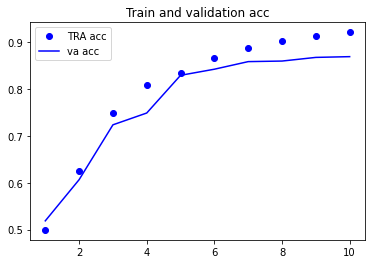

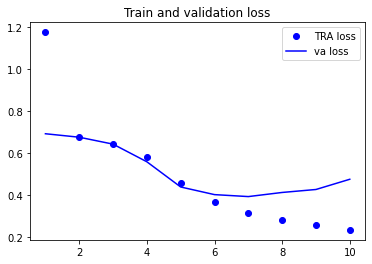

In [6]:
from matplotlib import pyplot as plt
acc= history.history['acc']
val_acc = history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,acc,'bo',label='TRA acc')
plt.plot(epochs,val_acc,'b',label='va acc')
plt.title('Train and validation acc')
plt.legend()
plt.savefig('IMDB_Conv1_v1_acc.png')
plt.show()
plt.figure()
plt.plot(epochs,loss,'bo',label='TRA loss')
plt.plot(epochs,val_loss,'b',label='va loss')
plt.title('Train and validation loss')
plt.legend()

plt.savefig('IMDB_Conv1_v1_loss.png')
plt.show()